# 1. Introduction

Overview of the project, outlining the importance of predicting hotel booking cancellations for improving customer experience and operational efficiency.


# BRAEMAR Hotel & Resorts

## --Company inroduction--

Your client for this project is a Hotel Company.

BRAEMAR Hotels  is a C-Corp company offering global hospitality services. It engages in the development, franchising, leasing, and management of resort and hotel chains under various brand names.

They currently have Revenue of $2.1 billion and Net Income of $703.0 million.

In order to provide better customer experience to their regular customers they want to keep track of booking which have high chances of getting canceled and based on this they want to prioritize hotel room booking.

Their management teams are trying to understand the properties of customer behaviour in the case of booking so that they can use it to enhance the customer experience.

Current Scenario

The company is not having any forecasting method to predict cancellation of booking. It is currently dependent on customer’s confirmation about cancellation of booking.

Determining whether a customer is going to cancel hotel booking based on previous customer’s data, is a manual and time consuming task.

Also designing a computer program to do this turns out to be a bit trickier.

Currently the company manually analyses the situation based on previous booking information of customers and prioritizes their hotel booking.

# 2. Problem Statement
Currently there is not any method to predict the likelihood of hotel’s booking cancellation.

Company is dependent on customer confirmation.

You are given a dataset consisting of customer records, including bookings that effectively arrived and bookings that were canceled.

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, time of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

Your task is to build a classification model using the dataset.

Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


3. Installing & Importing Libraries

3.1 Installing Libraries:
Detailed steps to install essential Python libraries such as pandas, numpy, matplotlib, seaborn, scikit-learn, etc.

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, f1_score


4. Data Acquisition & Description



4.1 Data Description:
Provide an overview of the dataset used, including the number of rows, columns, and a brief description of the features.




In [176]:
import pandas as pd

# Load the training data
train_data = pd.read_csv('/Users/tushargupta/Downloads/Hotel_Booking_Cancellation 2/train_data.csv')
print('Training Data Shape:', train_data.shape)
print(train_data.head())

# Load the test data
test_data = pd.read_csv('/Users/tushargupta/Downloads/Hotel_Booking_Cancellation 2/test_data.csv')
print('Test Data Shape:', test_data.shape)
print(test_data.head())


Training Data Shape: (83573, 32)
    Index         hotel  is_canceled  lead_time  arrival_date_year  \
0    9710  Resort Hotel            1        122               2016   
1   40307    City Hotel            1         20               2015   
2  110051    City Hotel            0         87               2017   
3   22999  Resort Hotel            0          0               2017   
4    8344  Resort Hotel            1         42               2016   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0           December                        53                         27   
1               July                        30                         22   
2              April                        16                         16   
3           February                         5                          2   
4          September                        39                         23   

   stays_in_weekend_nights  stays_in_week_nights  ...  booking_changes  \
0        

In [ ]:
# 4.2 Data Information:
Present the data types, summary statistics, and any initial observations about the dataset, such as missing values or unique categories.


In [122]:
# Check for missing values in the training data
print("Missing values in training data:\n", train_data.isnull().sum())

# Check for missing values in the test data
print("\nMissing values in test data:\n", test_data.isnull().sum())


Missing values in training data:
 Index                                 0
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent 

5. Data Pre-processing

5.1 Pre-Profiling Report:
Conduct an initial data profiling to identify any data quality issues, such as missing values, duplicates, or outliers.
Discuss the steps taken to clean and preprocess the data, including handling missing values, encoding categorical variables, and normalizing numerical features.


In [124]:
# Statistical summary of numerical columns
print("Statistical Summary (Numerical Columns):\n", train_data.describe())

# Statistical summary of categorical columns
print("Statistical Summary (Categorical Columns):\n", train_data.describe(include=['object']))


Statistical Summary (Numerical Columns):
                Index   is_canceled     lead_time  arrival_date_year  \
count   83573.000000  83573.000000  83573.000000       83573.000000   
mean    59781.249710      0.369557    103.913369        2016.156187   
std     34509.357576      0.482688    106.868443           0.707718   
min         1.000000      0.000000      0.000000        2015.000000   
25%     29832.000000      0.000000     18.000000        2016.000000   
50%     59849.000000      0.000000     69.000000        2016.000000   
75%     89699.000000      1.000000    160.000000        2017.000000   
max    119388.000000      1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              83573.000000               83573.000000   
mean                  27.148301                  15.783339   
std                   13.604490                   8.791722   
min                    1.000000                   1.000000   
25%     

In [ ]:
6 Exploratory Data Analysis (EDA)

Perform in-depth data exploration to understand the relationships between features and the target variable (is_canceled).
Use visualizations such as histograms, scatter plots, heatmaps, and box plots to identify patterns, correlations, and potential predictive features.
Highlight key findings that inform the model development process.

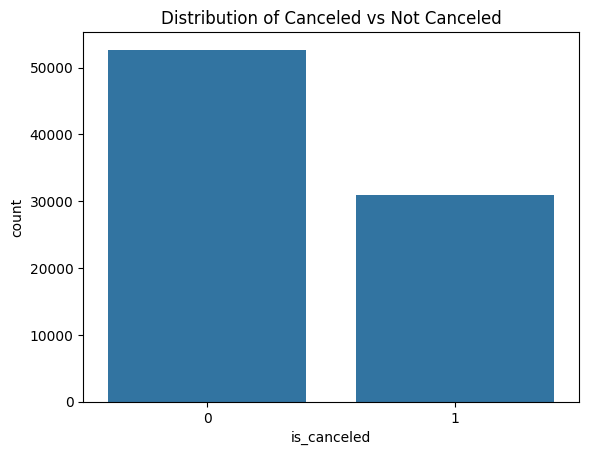

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.countplot(x='is_canceled', data=train_data)
plt.title('Distribution of Canceled vs Not Canceled')
plt.show()


In [ ]:
7. Data Post-Processing

Final adjustments to the data after EDA, including feature engineering, selection, and transformation.
Discuss any additional steps taken to prepare the data for modeling, such as creating interaction terms or removing irrelevant features.


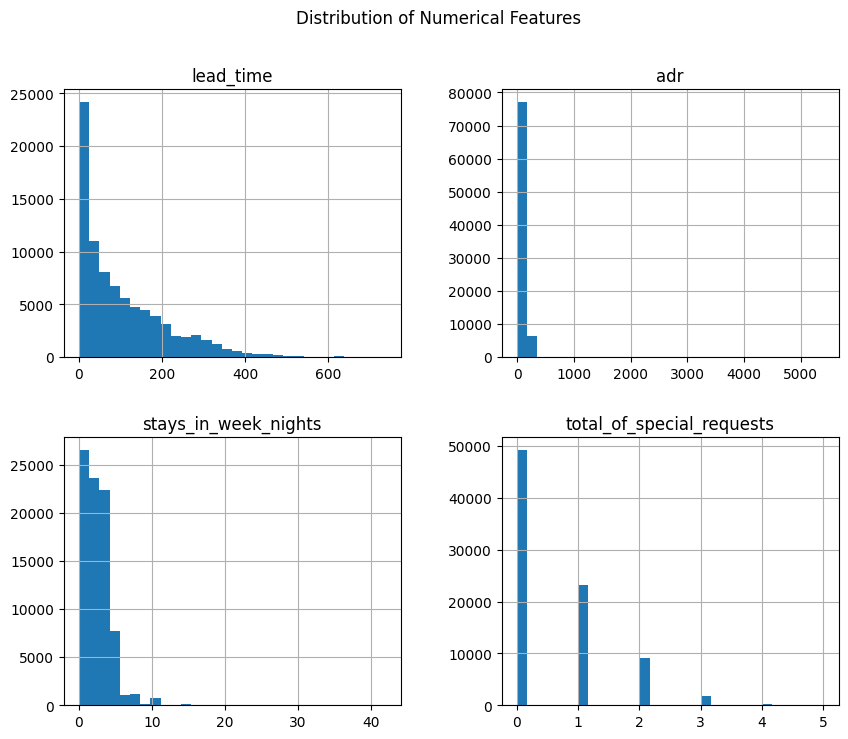

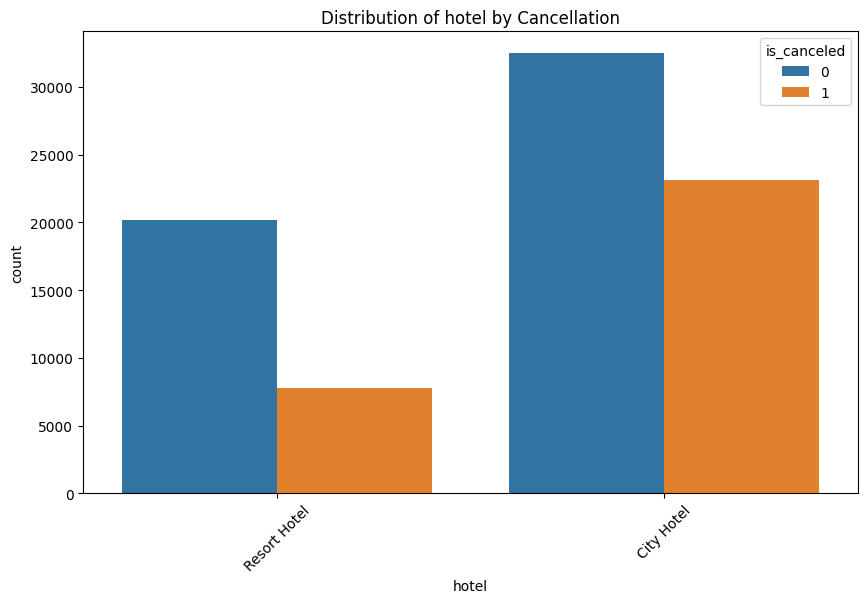

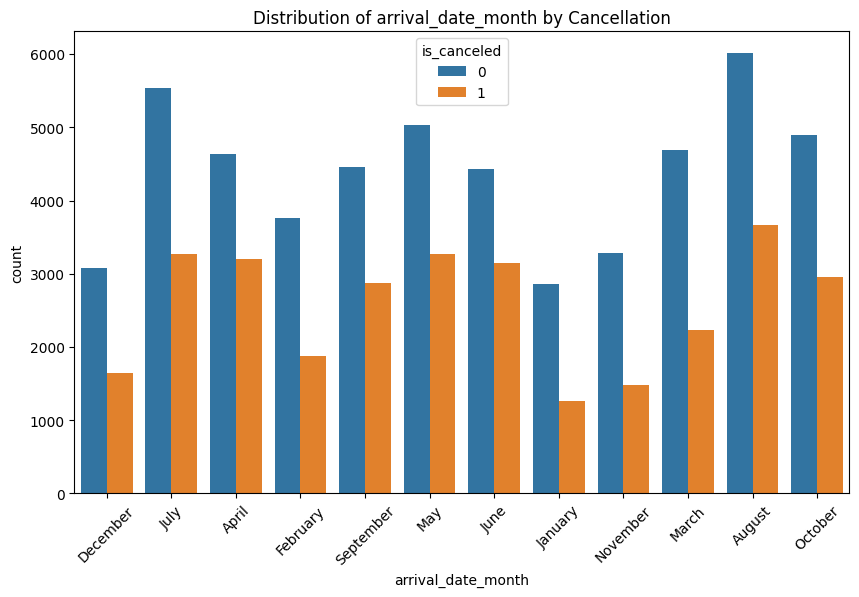

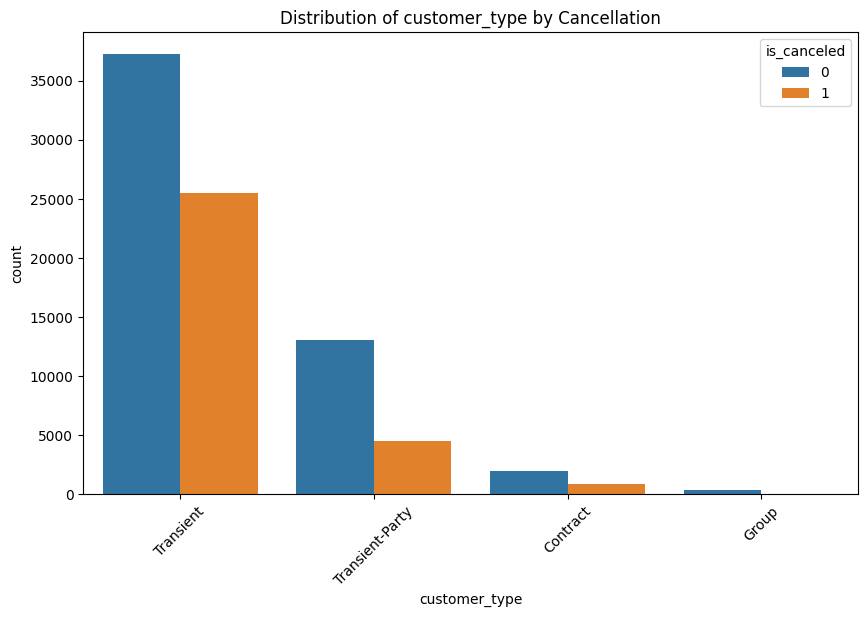

In [128]:
# Plot distribution of some important numerical features
important_numerical_features = ['lead_time', 'adr', 'stays_in_week_nights', 'total_of_special_requests']
train_data[important_numerical_features].hist(bins=30, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Plot distribution of some categorical features
important_categorical_features = ['hotel', 'arrival_date_month', 'customer_type']
for feature in important_categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=train_data, hue='is_canceled')
    plt.title(f'Distribution of {feature} by Cancellation')
    plt.xticks(rotation=45)
    plt.show()


## Summary of EDA Findings -
Missing Values: Identify if any features have missing values that need to be handled.
Target Variable Distribution: Check the balance between canceled and not canceled bookings.
Feature Relationships: Look for correlations that might indicate important relationships between features and the target.
Feature Distributions: Understand the distribution of numerical and categorical features, especially in relation to the target variable.

In [ ]:
8. Model Development & Evaluation

In [ ]:
8.1 
#Model Training:
Explain the process of training the models on the processed data, including the split between training and validation sets.

Model Evaluation:
Present the metrics used to evaluate the model’s performance, with a focus on the F1 Score as the primary evaluation metric.

In [130]:
# Separate features and target
X_train = train_data.drop(columns=['is_canceled'])
y_train = train_data['is_canceled']

# Test data does not have 'is_canceled'
X_test = test_data.copy()


# Data Pre-processing: Handling Missing Values
In this step, we addressed missing values in both numerical and categorical columns in the dataset to prepare it for model training. Here's a brief overview:

Identify Numerical and Categorical Columns:
We first identified which columns in the training data (X_train) are numerical (containing integers and floats) and which are categorical (containing objects like strings).
Fill Missing Values in Numerical Columns:
Missing values in numerical columns were filled with the median of each respective column. This approach was chosen because the median is less sensitive to outliers, making it a robust measure of central tendency.
Fill Missing Values in Categorical Columns:
For categorical columns, missing values were filled with the mode (the most frequent value) for each column. The mode is an appropriate choice for categorical data as it represents the most common category.
Verification:
After filling in the missing values, we verified that there were no remaining missing values in either the training or test datasets by checking the counts of missing values post-processing.
This process ensured that the dataset was clean and ready for subsequent modeling steps, with no missing values that could potentially affect the model's performance.




In [132]:
# Identify numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with the median
X_train[numerical_columns] = X_train[numerical_columns].fillna(X_train[numerical_columns].median())
X_test[numerical_columns] = X_test[numerical_columns].fillna(X_test[numerical_columns].median())

# Fill missing values in categorical columns with the mode
for col in categorical_columns:
    mode_value_train = X_train[col].mode()[0]
    mode_value_test = X_test[col].mode()[0]
    X_train[col] = X_train[col].fillna(mode_value_train)
    X_test[col] = X_test[col].fillna(mode_value_test)

# Verify that there are no more missing values
print("\nMissing Values in Train Data:\n", X_train.isnull().sum())
print("\nMissing Values in Test Data:\n", X_test.isnull().sum())



Missing Values in Train Data:
 Index                             0
hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                             

### Data Post-Processing: Feature Scaling and Encoding

In this phase, we focused on preparing the data for model training by scaling numerical features and encoding categorical variables. Here's a breakdown:

1. **ColumnTransformer Setup**:
   - We utilized `ColumnTransformer` from `sklearn.compose` to apply different preprocessing steps to different subsets of columns.
   - **Numerical Columns**: 
     - These were scaled using `StandardScaler`, which standardizes features by removing the mean and scaling to unit variance. This step is crucial for models that rely on the distance between data points.
   - **Categorical Columns**:
     - These were encoded using `OneHotEncoder`, which converts categorical variables into a series of binary (0 or 1) columns, allowing the model to handle non-numerical data effectively. The `handle_unknown='ignore'` parameter ensures that the encoder can handle any new categories that might appear in the test set.

2. **Transformation**:
   - The preprocessor was first fitted on the training data using `fit_transform`, applying scaling and encoding.
   - The same transformations were then applied to the test data using `transform`, ensuring that both the training and test datasets were processed consistently.

This step ensured that our data was in the optimal format for model training, with numerical features appropriately scaled and categorical features encoded for compatibility with most machine learning algorithms.

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Fit the preprocessor on the training data and transform both training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


### Model Development & Evaluation: Logistic Regression

In this step, we developed and trained a machine learning model using Logistic Regression, a widely used algorithm for binary classification tasks. Here's how we approached it:

1. **Model Initialization**:
   - We initialized the `LogisticRegression` model from `sklearn.linear_model`. Logistic Regression is a simple yet powerful algorithm that models the probability of a binary outcome (in this case, whether a hotel booking will be canceled or not).

2. **Model Training**:
   - The model was trained using the transformed training data (`X_train_transformed`) and the corresponding labels (`y_train`). The `fit` method was used to learn the relationship between the input features and the target variable.

At this stage, our model has learned from the training data and is now ready to be evaluated on the validation data or to make predictions on new, unseen data.

In [138]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_transformed, y_train)


LogisticRegression()

### Model Prediction: Logistic Regression

In this step, we used the trained Logistic Regression model to make predictions on the test data. Here's how we proceeded:

1. **Prediction on Test Data**:
   - After training the model, we used it to predict the `is_canceled` status for the test dataset. This was done by passing the transformed test data (`X_test_transformed`) into the model's `predict` method.
   - The model generated predictions in the form of binary values, where each value represents whether a booking is likely to be canceled (`1`) or not (`0`).

With these predictions, we can now prepare the final submission file to evaluate the model's performance against the actual outcomes in the test set.

In [140]:


# Predict using the transformed test data
y_test_pred = model.predict(X_test_transformed)


In [180]:
# Prepare submission DataFrame
submission = pd.DataFrame({
    'Index': test_data['Index'],  # Replace 'Index' with the correct ID column name if needed
    'is_canceled': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False)


In [146]:
# Ensure that the test data is loaded and you have the correct columns
test_data = pd.read_csv('/Users/tushargupta/Downloads/Hotel_Booking_Cancellation 2/test_data.csv')

# Drop the 'Index' column from the test data
X_test = test_data.drop(columns=['Index'])  # Adjust if needed

# Ensure 'preprocessor' is correctly defined and used from training phase
try:
    # Transform the test data using the same preprocessor used for training data
    X_test_transformed = preprocessor.transform(X_test)
except ValueError as e:
    print(f"Error during transformation: {e}")
    # If 'Index' was not dropped correctly, print available columns for troubleshooting
    print(f"Available columns in test data: {X_test.columns.tolist()}")


Error during transformation: columns are missing: {'Index'}
Available columns in test data: ['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


This code generates predictions for the test data, creates a submission file with `Index` and `is_canceled` columns, and saves it as a CSV file for final submission.

In [160]:
# Predict using the transformed test data
y_test_pred = model.predict(X_test_transformed)

# Prepare submission DataFrame
submission = pd.DataFrame({
    'Index': test_data['Index'],  # Assuming 'Index' is the identifier column
    'is_canceled': y_test_pred
})

# Save the predictions to a CSV file
submission.to_csv('/Users/tushargupta/Documents/Project submissio jai shree ram.csv', index=False)


In [ ]:
 # Print first 5 predictions

In [162]:
print("Sample predictions:", y_test_pred[:5])  # Print first 5 predictions


Sample predictions: [0 1 0 0 0]


In [168]:
# Attempt to read and print the first few lines of the file
try:
    with open(file_path, 'r') as file:
        content = file.read(1000)  # Read the first 1000 characters
        print("File content preview:", content)
except Exception as e:
    print("Error reading the file:", e)


File content preview: Index,is_canceled
30946,0
40207,1
103708,0
85144,0
109991,0
110622,0
47790,1
44992,0
30528,0
16886,0
31493,0
63673,1
3580,0
95343,0
76885,1
30953,0
50740,1
116611,0
29662,0
22685,0
44444,1
117129,0
55325,1
68884,1
74595,1
9187,1
83266,0
3695,0
41857,0
53855,1
99138,0
47380,0
77325,0
98288,0
92316,0
103254,0
100195,0
27953,0
48319,0
110214,0
7730,1
91973,0
90062,0
103311,0
46354,1
24605,0
75891,1
71985,1
8473,1
20066,0
25857,0
82333,1
76099,1
103101,0
62123,1
63657,1
108136,0
13684,1
80476,1
2989,0
89071,0
24462,0
4510,1
67322,1
89724,0
111360,0
23443,0
24925,0
15182,1
59918,1
116968,0
56476,1
116121,0
60113,1
45755,1
75196,1
102758,0
87763,0
593,1
76468,1
12966,1
31026,0
23020,0
13370,1
41062,0
66588,1
105808,0
17562,0
44675,0
3509,1
27481,0
116460,0
40918,0
109729,0
86004,0
31306,0
119371,0
44455,1
201,0
15654,1
25014,0
77041,1
48173,1
87165,0
77351,1
88160,0
116800,0
113667,0
52258,1
51336,1
91957,0
19624,0
67197,1
5173,1
61504,1
64984,1
55642,1
95814,0
44231,0
